Importando bibliotecas python

In [1]:
from datetime import datetime, date
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

O intuito é que mensalmente o modelo seja rodado para que os pesos e variáveis sejam ajustadas, logo, é como se mensalmente tivéssemos um novo modelo que se ajusta às informações mais recentes

Leitura dos arquivos de pedidos, filial, pessoas e produtos

In [2]:
pedidos = pd.concat ([pd.read_csv ('Pedidos_2016.csv', encoding = 'utf_8'),pd.read_csv ('Pedidos_2017.csv', encoding = 'utf_8'),pd.read_csv ('Pedidos_2018.csv', encoding = 'utf_8'),pd.read_csv ('Pedidos_2019.csv', encoding = 'utf_8'),pd.read_csv ('Pedidos_2020.csv', encoding = 'utf_8')],ignore_index=True)
filial = pd.read_csv ('FILIAL.csv', encoding = 'utf_8',sep=';',usecols = {'CD_FIL','SG_FIL','NM_FIL','DT_INAUGURACAO','DT_ENCERRAMENTO','SG_ESTADO','NM_CIDADE','REGIAO','SG_PORT'})
pessoas = pd.read_csv ('Pessoas.csv', encoding = 'utf_8', usecols = {'PK_ID_PESSOA','IN_SEXO','DT_CAD','DS_SEGMENTO','TIPO_LOJA'})
produtos = pd.read_csv ('PRODUTOS.csv', encoding = 'utf_8',sep=';')

Alterando DATA_PEDIDO, DT_INAUGURACAO e DT_CAD para o formato data

In [3]:
pedidos['DATA_PEDIDO'] = pd.to_datetime(pedidos['DATA_PEDIDO'])
pessoas['DT_CAD'] = pd.to_datetime(pessoas['DT_CAD'])
filial['DT_INAUGURACAO'] = pd.to_datetime(filial['DT_INAUGURACAO'])

Excluindo filiais encerradas (não impacta na quantidade de pedidos e volume gasto)

In [4]:
filial = filial.loc[(filial['NM_FIL'] != 'Encerrada')]

Entrando com ano e mes de referencia para modelagem (ultimo mes fechado)

In [5]:
if datetime.now().month == 1:
    mes_ref = 12
    ano_ref = datetime.now().year-1
else:
    mes_ref = datetime.now().month-1
    ano_ref = datetime.now().year

Criando meses de referencia (são os 48meses que serão utilizados na modelagem)

In [6]:
d = date (ano_ref,mes_ref,1)
pedidos['d'] = date (ano_ref,mes_ref,1)
filial ['d'] = date (ano_ref,mes_ref,1)
pessoas['d'] = date (ano_ref,mes_ref,1)

d48 = date (d.year-4,d.month,1)
pedidos['d48'] = d48

d36 = date (d.year-3,d.month,1)
pedidos['d36'] = d36

d24 = date (d.year-2,d.month,1)
pedidos['d24'] = d24

d12 = date (d.year-1,d.month,1)
pedidos['d12'] = d12

if d12.month == 12:
    d11 = date (d12.year+1,1,1)
    pedidos['d11'] = d11
else:
    d11 = date (d12.year,d12.month+1,1)
    pedidos['d11'] = d11
    
if d11.month == 12:
    d10 = date (d11.year+1,1,1)
    pedidos['d10'] = d10
else:
    d10 = date (d11.year,d11.month+1,1)
    pedidos['d10'] = d10
    
if d10.month == 12:
    d09 = date (d10.year+1,1,1)
    pedidos['d09'] = d09
else:
    d09 = date (d10.year,d10.month+1,1)
    pedidos['d09'] = d09
    
if d09.month == 12:
    d08 = date (d09.year+1,1,1)
    pedidos['d08'] = d08
else:
    d08 = date (d09.year,d09.month+1,1)
    pedidos['d08'] = d08
    
if d08.month == 12:
    d07 = date (d08.year+1,1,1)
    pedidos['d07'] = d07
else:
    d07 = date (d08.year,d08.month+1,1)
    pedidos['d07'] = d07
    
if d07.month == 12:
    d06 = date (d07.year+1,1,1)
    pedidos['d06'] = d06
else:
    d06 = date (d07.year,d07.month+1,1)
    pedidos['d06'] = d06
    
if d06.month == 12:
    d05 = date (d06.year+1,1,1)
    pedidos['d05'] = d05
else:
    d05 = date (d06.year,d06.month+1,1)
    pedidos['d05'] = d05
    
if d05.month == 12:
    d04 = date (d05.year+1,1,1)
    pedidos['d04'] = d04
else:
    d04 = date (d05.year,d05.month+1,1)
    pedidos['d04'] = d04
    
if d04.month == 12:
    d03 = date (d04.year+1,1,1)
    pedidos['d03'] = d03
else:
    d03 = date (d04.year,d04.month+1,1)
    pedidos['d03'] = d03
    
if d03.month == 12:
    d02 = date (d03.year+1,1,1)
    pedidos['d02'] = d02
else:
    d02 = date (d03.year,d03.month+1,1)
    pedidos['d02'] = d02
    
if d02.month == 12:
    d01 = date (d02.year+1,1,1)
    pedidos['d01'] = d01
else:
    d01 = date (d02.year,d02.month+1,1)
    pedidos['d01'] = d01

In [ ]:
# acrescentando datas de referencia para criação de variáveis nos bancos de dados

In [7]:
pedidos['d'] = pd.to_datetime(pedidos['d'])
filial['d'] = pd.to_datetime(filial['d'])
pessoas['d'] = pd.to_datetime(pessoas['d'])
pedidos['d01'] = pd.to_datetime(pedidos['d01'])
pedidos['d02'] = pd.to_datetime(pedidos['d02'])
pedidos['d03'] = pd.to_datetime(pedidos['d03'])
pedidos['d04'] = pd.to_datetime(pedidos['d04'])
pedidos['d05'] = pd.to_datetime(pedidos['d05'])
pedidos['d06'] = pd.to_datetime(pedidos['d06'])
pedidos['d07'] = pd.to_datetime(pedidos['d07'])
pedidos['d08'] = pd.to_datetime(pedidos['d08'])
pedidos['d09'] = pd.to_datetime(pedidos['d09'])
pedidos['d10'] = pd.to_datetime(pedidos['d10'])
pedidos['d11'] = pd.to_datetime(pedidos['d11'])
pedidos['d12'] = pd.to_datetime(pedidos['d12'])
pedidos['d24'] = pd.to_datetime(pedidos['d24'])
pedidos['d36'] = pd.to_datetime(pedidos['d36'])
pedidos['d48'] = pd.to_datetime(pedidos['d48'])

In [8]:
del d01,d02,d03,d04,d05,d06,d07,d08,d09,d10,d11,d12,d24,d36,d48

excluindo filiais que foram inauguradas após o período inicial de análise (não impacta em quantidade de pedidos e volume gasto)

In [9]:
filial = filial.loc[(filial['DT_INAUGURACAO'] < filial['d'])]
filial.drop(columns = {'d'}, inplace = True)

### Seleção de Elegíveis para Modelagem, ou seja, todas as pessoas que compraram nos últimos 12 meses, exceto no mês de referência

In [10]:
elegiveis = pedidos.loc[(pedidos['DATA_PEDIDO'] >= pedidos['d12']) & (pedidos['DATA_PEDIDO'] < pedidos['d']) & (pedidos['VALOR'] > 0) & (pedidos['SG_FIL'] != 'SLD')]

Criando variáveis 30, 60, 90, 120, 150, 180, 270, 360 dias - valor comprado e quantidade de pedidos

--> 30 DIAS

In [11]:
var_30dias = elegiveis.loc[(elegiveis['DATA_PEDIDO'] >= elegiveis['d01']) & (elegiveis['DATA_PEDIDO'] < elegiveis['d']) & (elegiveis['VALOR'] > 0)]
var_30dias = var_30dias.drop (columns = {'PK_DOC','NK_ID_PROD','CD_FIL','SG_FIL','NM_DIV','CD_DIV','CD_GEP','CD_FAM','DATA_PEDIDO','d','d48','d36','d24','d12','d11','d10','d09','d08','d07','d06','d05','d04','d03','d02','d01'})
var_30dias_valor = var_30dias.groupby(['PK_ID_PESSOA'], as_index=False)['VALOR'].sum()
var_30dias_valor.rename(columns = {'VALOR': 'VALOR_30D'}, inplace = True)
var_30dias_pedidos = var_30dias.groupby(['PK_ID_PESSOA','ID_PEDIDO_GERADO'], as_index=False)['VALOR'].count()
var_30dias_pedidos = var_30dias_pedidos.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_30dias_pedidos.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_PEDIDOS_30D'}, inplace = True)
var_30dias_itens = var_30dias.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_30dias_itens.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_ITENS_30D'}, inplace = True)

--> 60 DIAS

In [12]:
var_60dias = elegiveis.loc[(elegiveis['DATA_PEDIDO'] >= elegiveis['d02']) & (elegiveis['DATA_PEDIDO'] < elegiveis['d']) & (elegiveis['VALOR'] > 0)]
var_60dias = var_60dias.drop (columns = {'PK_DOC','NK_ID_PROD','CD_FIL','SG_FIL','NM_DIV','CD_DIV','CD_GEP','CD_FAM','DATA_PEDIDO','d','d48','d36','d24','d12','d11','d10','d09','d08','d07','d06','d05','d04','d03','d02','d01'})
var_60dias_valor = var_60dias.groupby(['PK_ID_PESSOA'], as_index=False)['VALOR'].sum()
var_60dias_valor.rename(columns = {'VALOR': 'VALOR_60D'}, inplace = True)
var_60dias_pedidos = var_60dias.groupby(['PK_ID_PESSOA','ID_PEDIDO_GERADO'], as_index=False)['VALOR'].count()
var_60dias_pedidos = var_60dias_pedidos.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_60dias_pedidos.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_PEDIDOS_60D'}, inplace = True)
var_60dias_itens = var_60dias.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_60dias_itens.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_ITENS_60D'}, inplace = True)

--> 90 DIAS

In [13]:
var_90dias = elegiveis.loc[(elegiveis['DATA_PEDIDO'] >= elegiveis['d03']) & (elegiveis['DATA_PEDIDO'] < elegiveis['d']) & (elegiveis['VALOR'] > 0)]
var_90dias = var_90dias.drop (columns = {'PK_DOC','NK_ID_PROD','CD_FIL','SG_FIL','NM_DIV','CD_DIV','CD_GEP','CD_FAM','DATA_PEDIDO','d','d48','d36','d24','d12','d11','d10','d09','d08','d07','d06','d05','d04','d03','d02','d01'})
var_90dias_valor = var_90dias.groupby(['PK_ID_PESSOA'], as_index=False)['VALOR'].sum()
var_90dias_valor.rename(columns = {'VALOR': 'VALOR_90D'}, inplace = True)
var_90dias_pedidos = var_90dias.groupby(['PK_ID_PESSOA','ID_PEDIDO_GERADO'], as_index=False)['VALOR'].count()
var_90dias_pedidos = var_90dias_pedidos.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_90dias_pedidos.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_PEDIDOS_90D'}, inplace = True)
var_90dias_itens = var_90dias.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_90dias_itens.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_ITENS_90D'}, inplace = True)

--> 120 DIAS

In [14]:
var_120dias = elegiveis.loc[(elegiveis['DATA_PEDIDO'] >= elegiveis['d04']) & (elegiveis['DATA_PEDIDO'] < elegiveis['d']) & (elegiveis['VALOR'] > 0)]
var_120dias = var_120dias.drop (columns = {'PK_DOC','NK_ID_PROD','CD_FIL','SG_FIL','NM_DIV','CD_DIV','CD_GEP','CD_FAM','DATA_PEDIDO','d','d48','d36','d24','d12','d11','d10','d09','d08','d07','d06','d05','d04','d03','d02','d01'})
var_120dias_valor = var_120dias.groupby(['PK_ID_PESSOA'], as_index=False)['VALOR'].sum()
var_120dias_valor.rename(columns = {'VALOR': 'VALOR_120D'}, inplace = True)
var_120dias_pedidos = var_120dias.groupby(['PK_ID_PESSOA','ID_PEDIDO_GERADO'], as_index=False)['VALOR'].count()
var_120dias_pedidos = var_120dias_pedidos.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_120dias_pedidos.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_PEDIDOS_120D'}, inplace = True)
var_120dias_itens = var_120dias.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_120dias_itens.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_ITENS_120D'}, inplace = True)

--> 150 DIAS

In [15]:
var_150dias = elegiveis.loc[(elegiveis['DATA_PEDIDO'] >= elegiveis['d05']) & (elegiveis['DATA_PEDIDO'] < elegiveis['d']) & (elegiveis['VALOR'] > 0)]
var_150dias = var_150dias.drop (columns = {'PK_DOC','NK_ID_PROD','CD_FIL','SG_FIL','NM_DIV','CD_DIV','CD_GEP','CD_FAM','DATA_PEDIDO','d','d48','d36','d24','d12','d11','d10','d09','d08','d07','d06','d05','d04','d03','d02','d01'})
var_150dias_valor = var_150dias.groupby(['PK_ID_PESSOA'], as_index=False)['VALOR'].sum()
var_150dias_valor.rename(columns = {'VALOR': 'VALOR_150D'}, inplace = True)
var_150dias_pedidos = var_150dias.groupby(['PK_ID_PESSOA','ID_PEDIDO_GERADO'], as_index=False)['VALOR'].count()
var_150dias_pedidos = var_150dias_pedidos.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_150dias_pedidos.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_PEDIDOS_150D'}, inplace = True)
var_150dias_itens = var_150dias.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_150dias_itens.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_ITENS_150D'}, inplace = True)

--> 180 DIAS

In [16]:
var_180dias = elegiveis.loc[(elegiveis['DATA_PEDIDO'] >= elegiveis['d06']) & (elegiveis['DATA_PEDIDO'] < elegiveis['d']) & (elegiveis['VALOR'] > 0)]
var_180dias = var_180dias.drop (columns = {'PK_DOC','NK_ID_PROD','CD_FIL','SG_FIL','NM_DIV','CD_DIV','CD_GEP','CD_FAM','DATA_PEDIDO','d','d48','d36','d24','d12','d11','d10','d09','d08','d07','d06','d05','d04','d03','d02','d01'})
var_180dias_valor = var_180dias.groupby(['PK_ID_PESSOA'], as_index=False)['VALOR'].sum()
var_180dias_valor.rename(columns = {'VALOR': 'VALOR_180D'}, inplace = True)
var_180dias_pedidos = var_180dias.groupby(['PK_ID_PESSOA','ID_PEDIDO_GERADO'], as_index=False)['VALOR'].count()
var_180dias_pedidos = var_180dias_pedidos.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_180dias_pedidos.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_PEDIDOS_180D'}, inplace = True)
var_180dias_itens = var_180dias.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_180dias_itens.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_ITENS_180D'}, inplace = True)

--> 270 DIAS

In [17]:
var_270dias = elegiveis.loc[(elegiveis['DATA_PEDIDO'] >= elegiveis['d09']) & (elegiveis['DATA_PEDIDO'] < elegiveis['d']) & (elegiveis['VALOR'] > 0)]
var_270dias = var_270dias.drop (columns = {'PK_DOC','NK_ID_PROD','CD_FIL','SG_FIL','NM_DIV','CD_DIV','CD_GEP','CD_FAM','DATA_PEDIDO','d','d48','d36','d24','d12','d11','d10','d09','d08','d07','d06','d05','d04','d03','d02','d01'})
var_270dias_valor = var_270dias.groupby(['PK_ID_PESSOA'], as_index=False)['VALOR'].sum()
var_270dias_valor.rename(columns = {'VALOR': 'VALOR_270D'}, inplace = True)
var_270dias_pedidos = var_270dias.groupby(['PK_ID_PESSOA','ID_PEDIDO_GERADO'], as_index=False)['VALOR'].count()
var_270dias_pedidos = var_270dias_pedidos.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_270dias_pedidos.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_PEDIDOS_270D'}, inplace = True)
var_270dias_itens = var_270dias.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_270dias_itens.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_ITENS_270D'}, inplace = True)

360 DIAS

In [18]:
var_360dias = elegiveis.loc[(elegiveis['DATA_PEDIDO'] >= elegiveis['d12']) & (elegiveis['DATA_PEDIDO'] < elegiveis['d']) & (elegiveis['VALOR'] > 0)]
var_360dias = var_360dias.drop (columns = {'PK_DOC','NK_ID_PROD','CD_FIL','SG_FIL','NM_DIV','CD_DIV','CD_GEP','CD_FAM','DATA_PEDIDO','d','d48','d36','d24','d12','d11','d10','d09','d08','d07','d06','d05','d04','d03','d02','d01'})
var_360dias_valor = var_360dias.groupby(['PK_ID_PESSOA'], as_index=False)['VALOR'].sum()
var_360dias_valor.rename(columns = {'VALOR': 'VALOR_360D'}, inplace = True)
var_360dias_pedidos = var_360dias.groupby(['PK_ID_PESSOA','ID_PEDIDO_GERADO'], as_index=False)['VALOR'].count()
var_360dias_pedidos = var_360dias_pedidos.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_360dias_pedidos.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_PEDIDOS_360D'}, inplace = True)
var_360dias_itens = var_360dias.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_360dias_itens.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_ITENS_360D'}, inplace = True)

720 dias

In [19]:
var_720dias = elegiveis.loc[(elegiveis['DATA_PEDIDO'] >= elegiveis['d24']) & (elegiveis['DATA_PEDIDO'] < elegiveis['d']) & (elegiveis['VALOR'] > 0)]
var_720dias = var_720dias.drop (columns = {'PK_DOC','NK_ID_PROD','CD_FIL','SG_FIL','NM_DIV','CD_DIV','CD_GEP','CD_FAM','DATA_PEDIDO','d','d48','d36','d24','d12','d11','d10','d09','d08','d07','d06','d05','d04','d03','d02','d01'})
var_720dias_valor = var_720dias.groupby(['PK_ID_PESSOA'], as_index=False)['VALOR'].sum()
var_720dias_valor.rename(columns = {'VALOR': 'VALOR_720D'}, inplace = True)
var_720dias_pedidos = var_720dias.groupby(['PK_ID_PESSOA','ID_PEDIDO_GERADO'], as_index=False)['VALOR'].count()
var_720dias_pedidos = var_720dias_pedidos.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_720dias_pedidos.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_PEDIDOS_720D'}, inplace = True)
var_720dias_itens = var_720dias.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_720dias_itens.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_ITENS_720D'}, inplace = True)

3 anos

In [20]:
var_1080dias = elegiveis.loc[(elegiveis['DATA_PEDIDO'] >= elegiveis['d36']) & (elegiveis['DATA_PEDIDO'] < elegiveis['d']) & (elegiveis['VALOR'] > 0)]
var_1080dias = var_1080dias.drop (columns = {'PK_DOC','NK_ID_PROD','CD_FIL','SG_FIL','NM_DIV','CD_DIV','CD_GEP','CD_FAM','DATA_PEDIDO','d','d48','d36','d24','d12','d11','d10','d09','d08','d07','d06','d05','d04','d03','d02','d01'})
var_1080dias_valor = var_1080dias.groupby(['PK_ID_PESSOA'], as_index=False)['VALOR'].sum()
var_1080dias_valor.rename(columns = {'VALOR': 'VALOR_1080D'}, inplace = True)
var_1080dias_pedidos = var_1080dias.groupby(['PK_ID_PESSOA','ID_PEDIDO_GERADO'], as_index=False)['VALOR'].count()
var_1080dias_pedidos = var_1080dias_pedidos.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_1080dias_pedidos.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_PEDIDOS_1080D'}, inplace = True)
var_1080dias_itens = var_1080dias.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_1080dias_itens.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_ITENS_1080D'}, inplace = True)

4 anos

In [21]:
var_1440dias = elegiveis.loc[(elegiveis['DATA_PEDIDO'] >= elegiveis['d48']) & (elegiveis['DATA_PEDIDO'] < elegiveis['d']) & (elegiveis['VALOR'] > 0)]
var_1440dias = var_1440dias.drop (columns = {'PK_DOC','NK_ID_PROD','CD_FIL','SG_FIL','NM_DIV','CD_DIV','CD_GEP','CD_FAM','DATA_PEDIDO','d','d48','d36','d24','d12','d11','d10','d09','d08','d07','d06','d05','d04','d03','d02','d01'})
var_1440dias_valor = var_1440dias.groupby(['PK_ID_PESSOA'], as_index=False)['VALOR'].sum()
var_1440dias_valor.rename(columns = {'VALOR': 'VALOR_1440D'}, inplace = True)
var_1440dias_pedidos = var_1440dias.groupby(['PK_ID_PESSOA','ID_PEDIDO_GERADO'], as_index=False)['VALOR'].count()
var_1440dias_pedidos = var_1440dias_pedidos.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_1440dias_pedidos.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_PEDIDOS_1440D'}, inplace = True)
var_1440dias_itens = var_1440dias.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_1440dias_itens.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_ITENS_1440D'}, inplace = True)

In [22]:
del var_30dias, var_60dias, var_90dias, var_120dias, var_150dias, var_180dias, var_270dias, var_360dias, var_720dias, var_1080dias, var_1440dias

Acrescentando produtos e filial na base de elegiveis

In [23]:
elegiveis = pd.merge(elegiveis, produtos, on = 'NK_ID_PROD', how = 'left', sort = True)
elegiveis = pd.merge(elegiveis, filial, on = 'CD_FIL', how = 'left', sort = True)

selecao de variáveis nominais para criação de dummies

In [24]:
elegiveis_obj = elegiveis.drop(columns={'PK_DOC','ID_PEDIDO_GERADO','DATA_PEDIDO','VALOR','CD_FIL','NK_ID_PROD',
                                         'CD_DIV_x','CD_GEP_x','CD_FAM_x','NM_PROD','CD_DIV_y','NM_DIV_y','CD_GEP_y',
                                         'CD_FAM_y','NM_FAM','SG_FIL_x','NM_FIL','DT_INAUGURACAO','DT_ENCERRAMENTO', 'SG_ESTADO',
                                         'd','d48','d36','d24','d12','d11','d10','d09','d08','d07','d06','d05','d04','d03','d02','d01'})

renomeando variáveis

In [25]:
elegiveis_obj.rename(columns = {'NM_DIV_x':'NM_DIV'}, inplace = True)
elegiveis_obj.rename(columns = {'SG_FIL_y':'SG_FIL'}, inplace = True)

criando dummies

In [26]:
elegiveis_dummies1 = pd.get_dummies(data = elegiveis_obj,columns={'SG_PORT'})
elegiveis_dummies2 = pd.get_dummies(data = elegiveis_obj,columns={'REGIAO'})
elegiveis_dummies3 = pd.get_dummies(data = elegiveis_obj,columns={'SG_FIL'})
elegiveis_dummies4 = pd.get_dummies(data = elegiveis_obj,columns={'DS_GEP'})
elegiveis_dummies5 = pd.get_dummies(data = elegiveis_obj,columns={'NM_DIV'})

criando dummies

In [27]:
elegiveis_dummies1.drop(columns = {'NM_DIV','DS_GEP','SG_FIL','NM_CIDADE','REGIAO'}, inplace = True)

In [28]:
elegiveis_dummies1 = elegiveis_dummies1.groupby(['PK_ID_PESSOA'], as_index=False).max()
elegiveis_dummies1['TT_PORT'] = (elegiveis_dummies1.sum (axis=1) - elegiveis_dummies1['PK_ID_PESSOA'])

In [29]:
elegiveis_dummies2.drop(columns = {'NM_DIV','DS_GEP','SG_FIL','NM_CIDADE','SG_PORT'}, inplace = True)

In [30]:
elegiveis_dummies2 = elegiveis_dummies2.groupby(['PK_ID_PESSOA'], as_index=False).max()
elegiveis_dummies2['TT_REGIOES'] = (elegiveis_dummies2.sum (axis=1) - elegiveis_dummies2['PK_ID_PESSOA'])

In [31]:
elegiveis_dummies3.drop(columns = {'NM_DIV','DS_GEP','REGIAO','NM_CIDADE','SG_PORT'}, inplace = True)

In [32]:
elegiveis_dummies3 = elegiveis_dummies3.groupby(['PK_ID_PESSOA'], as_index=False).max()
elegiveis_dummies3['TT_FILIAIS'] = (elegiveis_dummies3.sum (axis=1) - elegiveis_dummies3['PK_ID_PESSOA'])

In [33]:
elegiveis_dummies4.drop(columns = {'NM_DIV','SG_FIL','REGIAO','NM_CIDADE','SG_PORT'}, inplace = True)

In [34]:
elegiveis_dummies4 = elegiveis_dummies4.groupby(['PK_ID_PESSOA'], as_index=False).max()
elegiveis_dummies4['TT_GEP'] = (elegiveis_dummies4.sum (axis=1) - elegiveis_dummies4['PK_ID_PESSOA'])

In [35]:
elegiveis_dummies5.drop(columns = {'DS_GEP','SG_FIL','REGIAO','NM_CIDADE','SG_PORT'}, inplace = True)

In [36]:
elegiveis_dummies5 = elegiveis_dummies5.groupby(['PK_ID_PESSOA'], as_index=False).max()

In [37]:
elegiveis_id = elegiveis[['PK_ID_PESSOA']].drop_duplicates().reset_index(drop=True)

In [38]:
elegiveis_dummies = pd.merge(elegiveis_id, elegiveis_dummies1, on = 'PK_ID_PESSOA', how = 'left', sort = True)

In [39]:
elegiveis_dummies = pd.merge(elegiveis_dummies, elegiveis_dummies2, on = 'PK_ID_PESSOA', how = 'left', sort = True)

In [40]:
elegiveis_dummies = pd.merge(elegiveis_dummies, elegiveis_dummies3, on = 'PK_ID_PESSOA', how = 'left', sort = True)

In [41]:
elegiveis_dummies = pd.merge(elegiveis_dummies, elegiveis_dummies4, on = 'PK_ID_PESSOA', how = 'left', sort = True)

In [42]:
elegiveis_dummies = pd.merge(elegiveis_dummies, elegiveis_dummies5, on = 'PK_ID_PESSOA', how = 'left', sort = True)

In [43]:
del elegiveis_dummies1,elegiveis_dummies2,elegiveis_dummies3,elegiveis_dummies4,elegiveis_dummies5

merge da base de pessoas com os elegiveis

In [44]:
pessoas = pd.merge(elegiveis_id, pessoas, on = 'PK_ID_PESSOA', how = 'left', sort = True)

criando dummies das variaveis selecionadas

In [45]:
pessoas_dummies = pd.get_dummies(data = pessoas,columns={'DS_SEGMENTO','TIPO_LOJA','IN_SEXO'})

In [46]:
pessoas_dummies = pessoas_dummies.drop (columns = {'DT_CAD','d'})

criando tempo de cadastro

In [47]:
lista = ['DT_CAD','d']
tp_cadastro = pessoas.groupby (['PK_ID_PESSOA'], as_index=False)[lista].min()
tp_cadastro['TP_CADASTRO'] = abs (tp_cadastro['d'] - tp_cadastro['DT_CAD'])
tp_cadastro = tp_cadastro.drop(columns = {'d','DT_CAD'})
tp_cadastro.TP_CADASTRO = tp_cadastro.TP_CADASTRO.dt.days
del lista

Tempo da ultima compra

In [48]:
lista = ['DATA_PEDIDO','d']
ult_compra = elegiveis.groupby(['PK_ID_PESSOA'], as_index=False)[lista].max()
ult_compra['TP_ULT_COMPRA'] = abs (ult_compra['d'] - ult_compra['DATA_PEDIDO'])
ult_compra.drop(columns = {'d','DATA_PEDIDO'},inplace = True)
del lista

Construindo a variável resposta

In [49]:
resposta = pedidos.loc[(pedidos['DATA_PEDIDO'] >= pedidos['d']) & (pedidos['VALOR'] > 0)]

In [50]:
resposta = resposta[['PK_ID_PESSOA']].drop_duplicates().reset_index(drop=True)

In [51]:
resposta['RESPOSTA'] = 1

# Construindo a base final para modelagem (merge de todas as variáveis criadas)

In [52]:
base_final = pd.merge(elegiveis_id, var_30dias_valor, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base_final = pd.merge(base_final, var_30dias_pedidos, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base_final = pd.merge(base_final, var_30dias_itens, on = 'PK_ID_PESSOA', how = 'left', sort = True)

base_final = pd.merge(base_final, var_60dias_valor, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base_final = pd.merge(base_final, var_60dias_pedidos, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base_final = pd.merge(base_final, var_60dias_itens, on = 'PK_ID_PESSOA', how = 'left', sort = True)

base_final = pd.merge(base_final, var_90dias_valor, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base_final = pd.merge(base_final, var_90dias_pedidos, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base_final = pd.merge(base_final, var_90dias_itens, on = 'PK_ID_PESSOA', how = 'left', sort = True)

base_final = pd.merge(base_final, var_120dias_valor, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base_final = pd.merge(base_final, var_120dias_pedidos, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base_final = pd.merge(base_final, var_120dias_itens, on = 'PK_ID_PESSOA', how = 'left', sort = True)

base_final = pd.merge(base_final, var_150dias_valor, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base_final = pd.merge(base_final, var_150dias_pedidos, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base_final = pd.merge(base_final, var_150dias_itens, on = 'PK_ID_PESSOA', how = 'left', sort = True)

base_final = pd.merge(base_final, var_180dias_valor, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base_final = pd.merge(base_final, var_180dias_pedidos, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base_final = pd.merge(base_final, var_180dias_itens, on = 'PK_ID_PESSOA', how = 'left', sort = True)

base_final = pd.merge(base_final, var_270dias_valor, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base_final = pd.merge(base_final, var_270dias_pedidos, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base_final = pd.merge(base_final, var_270dias_itens, on = 'PK_ID_PESSOA', how = 'left', sort = True)

base_final = pd.merge(base_final, var_360dias_valor, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base_final = pd.merge(base_final, var_360dias_pedidos, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base_final = pd.merge(base_final, var_360dias_itens, on = 'PK_ID_PESSOA', how = 'left', sort = True)

base_final = pd.merge(base_final, var_720dias_valor, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base_final = pd.merge(base_final, var_720dias_pedidos, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base_final = pd.merge(base_final, var_720dias_itens, on = 'PK_ID_PESSOA', how = 'left', sort = True)

base_final = pd.merge(base_final, var_1080dias_valor, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base_final = pd.merge(base_final, var_1080dias_pedidos, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base_final = pd.merge(base_final, var_1080dias_itens, on = 'PK_ID_PESSOA', how = 'left', sort = True)

base_final = pd.merge(base_final, var_1440dias_valor, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base_final = pd.merge(base_final, var_1440dias_pedidos, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base_final = pd.merge(base_final, var_1440dias_itens, on = 'PK_ID_PESSOA', how = 'left', sort = True)

In [53]:
base_final = pd.merge(base_final, elegiveis_dummies, on = 'PK_ID_PESSOA', how = 'left', sort = True)

In [54]:
base_final = pd.merge(base_final, pessoas_dummies, on = 'PK_ID_PESSOA', how = 'left', sort = True)

In [55]:
base_final = base_final.replace (np.nan,0)

In [56]:
base_final = pd.merge(base_final, ult_compra, on = 'PK_ID_PESSOA', how = 'left', sort = True)

In [57]:
base_final.TP_ULT_COMPRA = base_final.TP_ULT_COMPRA.dt.days

In [58]:
base_final = pd.merge(base_final, tp_cadastro, on = 'PK_ID_PESSOA', how = 'left', sort = True)

In [59]:
base_final = pd.merge(base_final, resposta, on = 'PK_ID_PESSOA', how = 'left', sort = True)

In [60]:
base_final['RESPOSTA'] = base_final['RESPOSTA'].fillna(0)

In [61]:
base_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1368180 entries, 0 to 1368179
Columns: 166 entries, PK_ID_PESSOA to RESPOSTA
dtypes: float64(27), int64(14), uint8(125)
memory usage: 601.5 MB


In [62]:
base_final.dropna(inplace=True)

#deletando variaveis para liberar memória

In [63]:
del var_30dias_valor, var_30dias_pedidos, var_60dias_valor, var_60dias_pedidos
del var_90dias_valor, var_90dias_pedidos, var_120dias_valor, var_120dias_pedidos
del var_150dias_valor, var_150dias_pedidos, var_180dias_valor, var_180dias_pedidos
del var_270dias_valor, var_270dias_pedidos, var_360dias_valor, var_360dias_pedidos
del elegiveis_obj, pessoas_dummies, tp_cadastro, resposta, ult_compra
del var_30dias_itens, var_60dias_itens, var_90dias_itens, var_120dias_itens, var_150dias_itens, var_180dias_itens 
del var_270dias_itens, var_360dias_itens

In [64]:
del var_720dias_valor, var_720dias_pedidos, var_1080dias_valor, var_1080dias_pedidos, var_1440dias_valor, var_1440dias_pedidos
del var_720dias_itens, var_1080dias_itens, var_1440dias_itens

## Modelagem

Selecionando amostragem

In [65]:
resp0 = base_final.loc[(base_final['RESPOSTA'] == 0)]
resp1 = base_final.loc[(base_final['RESPOSTA'] == 1)]
resp1 = resp1.sample(n = 50000)
tam_amostra = base_final['RESPOSTA'].value_counts()[1]
resp0 = base_final.sample(tam_amostra)
amostra_balanceada = pd.concat([resp0,resp1])

#como a qtde de variáveis é muito grande utilizamos o código abaixo para selecionar apenas as melhores delas, ou seja, aquelas que estão mais correlacionadas com a variável resposta

In [66]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, SelectPercentile

In [67]:
numerics = ['float64', 'int64', 'uint8']
numerical = list (amostra_balanceada.select_dtypes (include = numerics).columns)
data = amostra_balanceada[numerical]

In [68]:
X_train, X_test, y_train, y_test = train_test_split (data.drop(['PK_ID_PESSOA','RESPOSTA'], axis = 1), data['RESPOSTA'],
                                                    test_size = 0.3, random_state = 0)

In [69]:
import matplotlib.pyplot as plt
mi = mutual_info_classif (X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi = mi.sort_values (ascending = False)

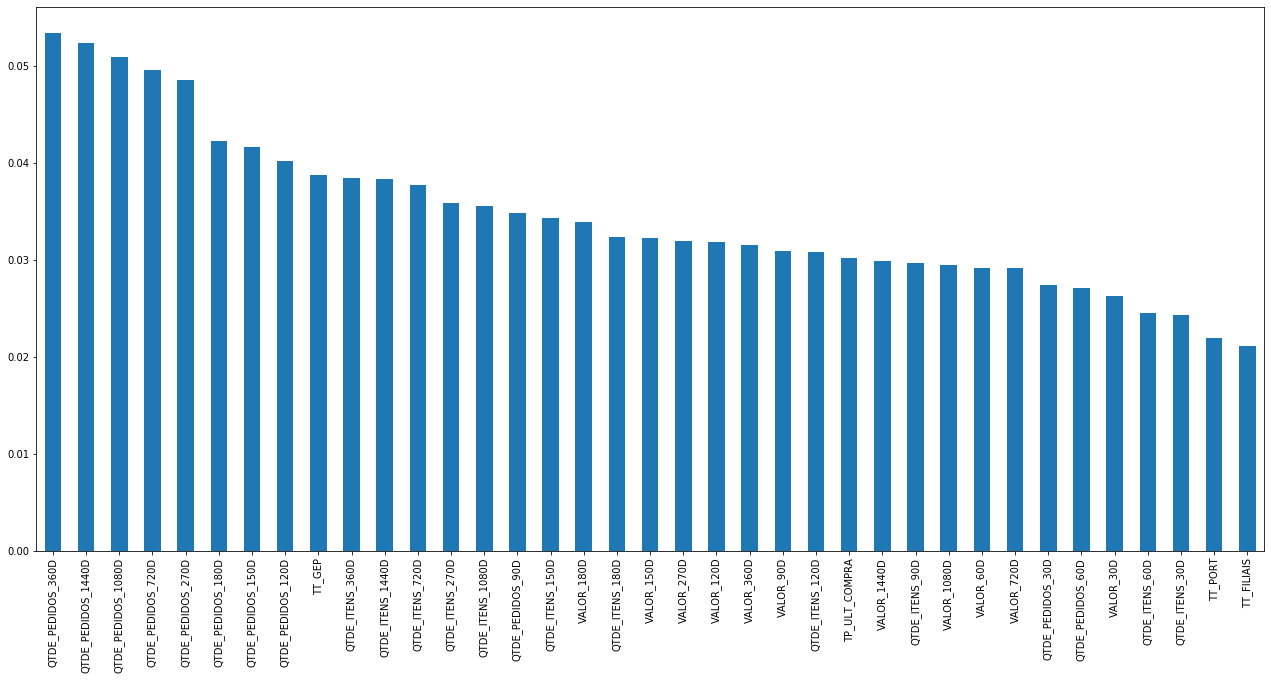

In [70]:
mi[0:len(mi[mi > 0.02])].plot.bar(figsize = (22,10))
plt.show()

In [71]:
sel_ = SelectKBest (mutual_info_classif, k = len(mi[mi > 0.02])).fit (X_train, y_train)
lista = (X_train.columns [sel_.get_support()])

In [72]:
predictors = pd.DataFrame(data = amostra_balanceada, columns = lista)
target = amostra_balanceada["RESPOSTA"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.3, random_state = 0)

# Modelagem

In [73]:
# Decision Tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decisiontree = DecisionTreeClassifier()
dt_grid = {'max_depth' : [7,8,9,10,11,12],
           'criterion' : ['gini','entropy']}
gs_dt = GridSearchCV(decisiontree, dt_grid)
gs_dt.fit(x_train, y_train)
best_model_dt = gs_dt.best_estimator_
y_pred_dec = best_model_dt.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred_dec, y_val) * 100, 2)
y_pred_prob_dec = best_model_dt.predict_proba(x_val)    
print(acc_decisiontree)

67.91


In [74]:
#pd.DataFrame(gs_dt.cv_results_).sort_values (by='rank_test_score').head(10)

In [75]:
# Gradiente Boosting

from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()

dt_grid = {'loss'          : ['deviance','exponential'],
           'n_estimators'  : [100],
           'max_depth'     : [4,6,8]}
gs_gbk = GridSearchCV(gbk, dt_grid,verbose=2)
gs_gbk.fit(x_train, y_train)
best_model_gbk = gs_gbk.best_estimator_
y_pred_gbk = best_model_gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred_gbk, y_val) * 100, 2)
print(acc_gbk)
y_pred_prob_gbk = best_model_gbk.predict_proba(x_val)    

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] loss=deviance, max_depth=4, n_estimators=300 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... loss=deviance, max_depth=4, n_estimators=300, total= 2.6min
[CV] loss=deviance, max_depth=4, n_estimators=300 ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.6min remaining:    0.0s


[CV] ..... loss=deviance, max_depth=4, n_estimators=300, total= 2.5min
[CV] loss=deviance, max_depth=4, n_estimators=300 ....................
[CV] ..... loss=deviance, max_depth=4, n_estimators=300, total= 2.5min
[CV] loss=deviance, max_depth=4, n_estimators=300 ....................
[CV] ..... loss=deviance, max_depth=4, n_estimators=300, total= 2.5min
[CV] loss=deviance, max_depth=4, n_estimators=300 ....................
[CV] ..... loss=deviance, max_depth=4, n_estimators=300, total= 2.5min
[CV] loss=deviance, max_depth=6, n_estimators=300 ....................
[CV] ..... loss=deviance, max_depth=6, n_estimators=300, total= 3.8min
[CV] loss=deviance, max_depth=6, n_estimators=300 ....................
[CV] ..... loss=deviance, max_depth=6, n_estimators=300, total= 3.7min
[CV] loss=deviance, max_depth=6, n_estimators=300 ....................
[CV] ..... loss=deviance, max_depth=6, n_estimators=300, total= 3.9min
[CV] loss=deviance, max_depth=6, n_estimators=300 ....................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 114.2min finished


67.94


In [76]:
#pd.DataFrame(gs.cv_results_).sort_values (by='rank_test_score').head(10)

In [77]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

dt_grid = {'n_neighbors'   : [5,7,9,11,13,15,17],
           'weights'        : ['uniform','distance']}
gs_knn = GridSearchCV(knn, dt_grid,verbose=2)
gs_knn.fit(x_train, y_train)
best_model_knn = gs_knn.best_estimator_
y_pred_knn = best_model_knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred_knn,y_val) * 100, 2)
print(acc_knn)
y_pred_prob_knn = best_model_knn.predict_proba(x_val)    

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] n_neighbors=5, weights=uniform ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... n_neighbors=5, weights=uniform, total=   5.5s
[CV] n_neighbors=5, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV] ................... n_neighbors=5, weights=uniform, total=   5.1s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   4.4s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   4.5s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   5.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=   4.0s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=   3.7s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=   3.9s
[CV] n_neighbors=5, weights=distance .................................
[CV] .

[CV] ................. n_neighbors=15, weights=distance, total=   4.7s
[CV] n_neighbors=17, weights=uniform .................................
[CV] .................. n_neighbors=17, weights=uniform, total=   5.6s
[CV] n_neighbors=17, weights=uniform .................................
[CV] .................. n_neighbors=17, weights=uniform, total=   5.2s
[CV] n_neighbors=17, weights=uniform .................................
[CV] .................. n_neighbors=17, weights=uniform, total=   4.9s
[CV] n_neighbors=17, weights=uniform .................................
[CV] .................. n_neighbors=17, weights=uniform, total=   5.0s
[CV] n_neighbors=17, weights=uniform .................................
[CV] .................. n_neighbors=17, weights=uniform, total=   5.7s
[CV] n_neighbors=17, weights=distance ................................
[CV] ................. n_neighbors=17, weights=distance, total=   4.7s
[CV] n_neighbors=17, weights=distance ................................
[CV] .

[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  5.4min finished


66.58


In [78]:
#pd.DataFrame(gs.cv_results_).sort_values (by='rank_test_score').head(10)

In [79]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
#maxiter

logreg = LogisticRegression()
dt_grid = {'fit_intercept' : [True,False],
           'max_iter'      : [7600]}
gs_lr = GridSearchCV(logreg, dt_grid,verbose=2)
gs_lr.fit(x_train, y_train)
best_model_lr = gs_lr.best_estimator_
y_pred_lr = best_model_lr.predict(x_val)
acc_logreg = round(accuracy_score(y_pred_lr, y_val) * 100, 2)
print(acc_logreg)
y_pred_prob_logreg = best_model_lr.predict_proba(x_val)    

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] fit_intercept=True, max_iter=7600 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ fit_intercept=True, max_iter=7600, total= 1.1min
[CV] fit_intercept=True, max_iter=7600 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV] ................ fit_intercept=True, max_iter=7600, total= 1.3min
[CV] fit_intercept=True, max_iter=7600 ...............................
[CV] ................ fit_intercept=True, max_iter=7600, total= 1.0min
[CV] fit_intercept=True, max_iter=7600 ...............................
[CV] ................ fit_intercept=True, max_iter=7600, total=  55.8s
[CV] fit_intercept=True, max_iter=7600 ...............................
[CV] ................ fit_intercept=True, max_iter=7600, total=  57.0s
[CV] fit_intercept=False, max_iter=7600 ..............................
[CV] ............... fit_intercept=False, max_iter=7600, total=  22.4s
[CV] fit_intercept=False, max_iter=7600 ..............................
[CV] ............... fit_intercept=False, max_iter=7600, total=  16.2s
[CV] fit_intercept=False, max_iter=7600 ..............................
[CV] ............... fit_intercept=False, max_iter=7600, total=  26.3s
[CV] fit_intercept=False, max_iter=7600 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  7.3min finished


67.75


In [80]:
#pd.DataFrame(gs.cv_results_).sort_values (by='rank_test_score').head(10)

In [81]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()

dt_grid = {'max_depth' : [6,8,10,12],
           'criterion' : ['gini','entropy']}
gs_rf = GridSearchCV(randomforest, dt_grid)
gs_rf.fit(x_train, y_train)
best_model_rf = gs_rf.best_estimator_
y_pred_rf = best_model_rf.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred_rf, y_val) * 100, 2)
print(acc_randomforest)
y_pred_prob_rf = best_model_rf.predict_proba(x_val)    

68.28


In [82]:
#pd.DataFrame(gs_rf.cv_results_).sort_values (by='rank_test_score').head(10)

In [83]:
#XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier()

dt_grid = {'max_depth'    : [3,5,7,9]}
gs_xgb = GridSearchCV(xgb, dt_grid)
gs_xgb.fit(x_train, y_train)
best_model_xgb = gs_xgb.best_estimator_
y_pred_xgb = best_model_xgb.predict(x_val)
acc_xgb = round(accuracy_score(y_pred_xgb, y_val) * 100, 2)
print(acc_xgb)
y_pred_prob_xgb = best_model_xgb.predict_proba(x_val)    

68.15


In [84]:
#pd.DataFrame(gs_xgb.cv_results_).sort_values (by='rank_test_score').head()

In [85]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier

boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

dt_grid = {'n_estimators' : [100]}

gs_boost = GridSearchCV(boost, dt_grid)
gs_boost.fit(x_train, y_train)
best_model_boost = gs_boost.best_estimator_
y_pred_boost = best_model_boost.predict(x_val)
acc_boost = round(accuracy_score(y_pred_boost, y_val) * 100, 2)
print(acc_boost)
y_pred_prob_ada = best_model_boost.predict_proba(x_val)    

63.4


In [86]:
#pd.DataFrame(gs_xgb.cv_results_).sort_values (by='rank_test_score').head()

In [87]:
# Selecionar o melhor modelo
models = pd.DataFrame({
    'Method': ['Decision Tree','Gradiente Booster','KNN', 'Logistic Regression', 'Random Forest', 'XGBoost','Adaboost'],
    'Score': [acc_decisiontree,acc_gbk,acc_knn, acc_logreg, acc_randomforest, acc_xgb, acc_boost]})
models.sort_values(by='Score', ascending=False, ignore_index=True, inplace = True)
models

,Method,Score
0,Random Forest,68.28
1,XGBoost,68.15
2,Gradiente Booster,67.94
3,Decision Tree,67.91
4,Logistic Regression,67.75
5,KNN,66.58
6,Adaboost,63.40


# aplica o modelo na base toda (não somente na amostra)

In [88]:
df = pd.DataFrame(data = base_final, columns = lista)

In [89]:
if models.Method[0] == 'Random Forest':
    randomforest = best_model_rf
    randomforest.fit(x_train, y_train)
    y_pred = randomforest.predict(df)
    y_pred_prob = randomforest.predict_proba(df)
elif models.Method[0] == 'Gradiente Booster':
    gbk = best_model_gbk
    gbk.fit(x_train, y_train)
    y_pred = gbk.predict(df)
    y_pred_prob = gbk.predict_proba(df)
elif models.Method[0] == 'XGBoost':
    xgb = best_model_xgb
    xgb.fit(x_train, y_train)
    y_pred = xgb.predict(df)
    y_pred_prob = xgb.predict_proba(df)
elif models.Method[0] == 'Adaboost':
    boost = best_model_boost
    boost.fit(x_train, y_train)
    y_pred = boost.predict(df)
    y_pred_prob = boost.predict_proba(df)
elif models.Method[0] == 'Decision Tree':
    decisiontree = best_model_dt
    decisiontree.fit(x_train, y_train)
    y_pred = decisiontree.predict(df)
    y_pred_prob = decisiontree.predict_proba(df)
elif models.Method[0] == 'Logistic Regression':
    logreg = best_model_lr
    logreg.fit(x_train, y_train)
    y_pred = logreg.predict(df)
    y_pred_prob = logreg.predict_proba(df)
elif models.Method[0] == 'KNN':
    knn = best_model_knn
    knn.fit(x_train, y_train)
    y_pred = knn.predict(df)
    y_pred_prob = knn.predict_proba(df)    

crio quintis para posterior definição de cortes

In [90]:
Base_Pontuada = pd.DataFrame({'PK_ID_PESSOA':base_final['PK_ID_PESSOA'],'PROBABILIDADE':y_pred_prob[:,1],'RESPOSTA_REALIZADA':base_final['RESPOSTA'],'RESPOSTA_PREDITA':y_pred})

In [91]:
cut_labels_20 = ['Faixa 01', 'Faixa 02', 'Faixa 03', 'Faixa 04','Faixa 05', 'Faixa 06', 'Faixa 07', 'Faixa 08', 'Faixa 09', 'Faixa 10',
                 'Faixa 11', 'Faixa 12', 'Faixa 13', 'Faixa 14','Faixa 15', 'Faixa 16', 'Faixa 17', 'Faixa 18', 'Faixa 19', 'Faixa 20',]

#Base_Pontuada['FX_SCORE'] = pd.qcut(Base_Pontuada['PROBABILIDADE'], 20, labels=cut_labels_20)

In [92]:
Maximo = Base_Pontuada.groupby(['FX_SCORE'], as_index=False)['PROBABILIDADE'].max()

In [93]:
Base_Pontuada = pd.merge(Base_Pontuada, Maximo, on = 'FX_SCORE', how = 'left', sort = True)

In [94]:
Base_Pontuada.to_csv('Tabela_Corte_Ativacao.csv')

Apagar variaveis para liberar memória

In [95]:
if models.Method[0] == 'Random Forest':
    del gbk,y_pred_gbk,acc_gbk
    del xgb,y_pred_xgb,acc_xgb
    del boost,y_pred_boost,acc_boost
    del decisiontree,y_pred_dec,acc_decisiontree
    del logreg,y_pred_lr,acc_logreg
    del knn,y_pred_knn,acc_knn
elif models.Method[0] == 'Gradiente Booster':
    del randomforest,y_pred_rf,acc_randomforest
    del xgb,y_pred_xgb,acc_xgb
    del boost,y_pred_boost,acc_boost
    del decisiontree,y_pred_dec,acc_decisiontree
    del logreg,y_pred_lr,acc_logreg
    del knn,y_pred_knn,acc_knn
elif models.Method[0] == 'XGBoost':
    del randomforest,y_pred_rf,acc_randomforest
    del gbk,y_pred_gbk,acc_gbk
    del boost,y_pred_boost,acc_boost
    del decisiontree,y_pred_dec,acc_decisiontree
    del logreg,y_pred_lr,acc_logreg
    del knn,y_pred_knn,acc_knn
elif models.Method[0] == 'Adaboost':
    del randomforest,y_pred_rf,acc_randomforest
    del gbk,y_pred_gbk,acc_gbk
    del xgb,y_pred_xgb,acc_xgb
    del decisiontree,y_pred_dec,acc_decisiontree
    del logreg,y_pred_lr,acc_logreg
    del knn,y_pred_knn,acc_knn
elif models.Method[0] == 'Decision Tree':
    del randomforest,y_pred_rf,acc_randomforest
    del gbk,y_pred_gbk,acc_gbk
    del xgb,y_pred_xgb,acc_xgb
    del boost,y_pred_boost,acc_boost
    del logreg,y_pred_lr,acc_logreg
    del knn,y_pred_knn,acc_knn
elif models.Method[0] == 'Logistic Regression':
    del randomforest,y_pred_rf,acc_randomforest
    del gbk,y_pred_gbk,acc_gbk
    del xgb,y_pred_xgb,acc_xgb
    del boost,y_pred_boost,acc_boost
    del decisiontree,y_pred_dec,acc_decisiontree
    del knn,y_pred_knn,acc_knn
elif models.Method[0] == 'KNN':
    del randomforest,y_pred_rf,acc_randomforest
    del gbk,y_pred_gbk,acc_gbk
    del xgb,y_pred_xgb,acc_xgb
    del boost,y_pred_boost,acc_boost
    del decisiontree,y_pred_dec,acc_decisiontree
    del logreg,y_pred_lr,acc_logreg

In [96]:
del pedidos, pessoas, produtos, d, elegiveis, elegiveis_id, elegiveis_dummies
del resp0, resp1, tam_amostra, amostra_balanceada, sel_, predictors, target, base_final, numerics, numerical
del data, mi, X_train, X_test, x_val, y_test, y_val
#del Base_Pontuada, Maximo

## Modelo Pronto!!! Agora é preparar a base a ser escorada

In [139]:
pedidos_ = pd.concat ([pd.read_csv ('Pedidos_2016.csv', encoding = 'utf_8'),pd.read_csv ('Pedidos_2017.csv', encoding = 'utf_8'),pd.read_csv ('Pedidos_2018.csv', encoding = 'utf_8'),pd.read_csv ('Pedidos_2019.csv', encoding = 'utf_8'),pd.read_csv ('Pedidos_2020.csv', encoding = 'utf_8')],ignore_index=True)
filial_ = filial
pessoas_ = pd.read_csv ('Pessoas.csv', encoding = 'utf_8', usecols = {'PK_ID_PESSOA','IN_SEXO','DT_CAD','DS_SEGMENTO','TIPO_LOJA'})
produtos_ = pd.read_csv ('PRODUTOS.csv', encoding = 'utf_8',sep=';')

In [140]:
pedidos_['DATA_PEDIDO'] = pd.to_datetime(pedidos_['DATA_PEDIDO'])
pessoas_['DT_CAD'] = pd.to_datetime(pessoas_['DT_CAD'])

In [141]:
d_ = date (ano_ref,mes_ref,1)


if d_.month == 12:
    d_1 = date (d_.year+1,1,1)
    pedidos_['d_1'] = d_1
    pessoas_['d_1'] = d_1
else:
    d_1 = date (d_.year,d_.month+1,1)
    pedidos_['d_1'] = d_1
    pessoas_['d_1'] = d_1

d48_ = date (d_1.year-4,d_1.month,1)
pedidos_['d48_'] = d48_

d36_ = date (d_1.year-3,d_1.month,1)
pedidos_['d36_'] = d36_
    
d24_ = date (d_1.year-2,d_1.month,1)
pedidos_['d24_'] = d24_
    
d12_ = date (d_1.year-1,d_1.month,1)
pedidos_['d12_'] = d12_

if d12_.month == 12:
    d11_ = date (d12_.year+1,1,1)
    pedidos_['d11_'] = d11_
else:
    d11_ = date (d12_.year,d12_.month+1,1)
    pedidos_['d11_'] = d11_
    
if d11_.month == 12:
    d10_ = date (d11_.year+1,1,1)
    pedidos_['d10_'] = d10_
else:
    d10_ = date (d11_.year,d11_.month+1,1)
    pedidos_['d10_'] = d10_
    
if d10_.month == 12:
    d09_ = date (d10_.year+1,1,1)
    pedidos_['d09_'] = d09_
else:
    d09_ = date (d10_.year,d10_.month+1,1)
    pedidos_['d09_'] = d09_
    
if d09_.month == 12:
    d08_ = date (d09_.year+1,1,1)
    pedidos_['d08_'] = d08_
else:
    d08_ = date (d09_.year,d09_.month+1,1)
    pedidos_['d08_'] = d08_
    
if d08_.month == 12:
    d07_ = date (d08_.year+1,1,1)
    pedidos_['d07_'] = d07_
else:
    d07_ = date (d08_.year,d08_.month+1,1)
    pedidos_['d07_'] = d07_
    
if d07_.month == 12:
    d06_ = date (d07_.year+1,1,1)
    pedidos_['d06_'] = d06_
else:
    d06_ = date (d07_.year,d07_.month+1,1)
    pedidos_['d06_'] = d06_
    
if d06_.month == 12:
    d05_ = date (d06_.year+1,1,1)
    pedidos_['d05_'] = d05_
else:
    d05_ = date (d06_.year,d06_.month+1,1)
    pedidos_['d05_'] = d05_
    
if d05_.month == 12:
    d04_ = date (d05_.year+1,1,1)
    pedidos_['d04_'] = d04_
else:
    d04_ = date (d05_.year,d05_.month+1,1)
    pedidos_['d04_'] = d04_
    
if d04_.month == 12:
    d03_ = date (d04_.year+1,1,1)
    pedidos_['d03_'] = d03_
else:
    d03_ = date (d04_.year,d04_.month+1,1)
    pedidos_['d03_'] = d03_
    
if d03_.month == 12:
    d02_ = date (d03_.year+1,1,1)
    pedidos_['d02_'] = d02_
else:
    d02_ = date (d03_.year,d03_.month+1,1)
    pedidos_['d02_'] = d02_
    
if d02_.month == 12:
    d01_ = date (d02_.year+1,1,1)
    pedidos_['d01_'] = d01_
else:
    d01_ = date (d02_.year,d02_.month+1,1)
    pedidos_['d01_'] = d01_

In [142]:
pessoas_['d_1'] = pd.to_datetime(pessoas_['d_1'])
pedidos_['d_1'] = pd.to_datetime(pedidos_['d_1'])
pedidos_['d01_'] = pd.to_datetime(pedidos_['d01_'])
pedidos_['d02_'] = pd.to_datetime(pedidos_['d02_'])
pedidos_['d03_'] = pd.to_datetime(pedidos_['d03_'])
pedidos_['d04_'] = pd.to_datetime(pedidos_['d04_'])
pedidos_['d05_'] = pd.to_datetime(pedidos_['d05_'])
pedidos_['d06_'] = pd.to_datetime(pedidos_['d06_'])
pedidos_['d07_'] = pd.to_datetime(pedidos_['d07_'])
pedidos_['d08_'] = pd.to_datetime(pedidos_['d08_'])
pedidos_['d09_'] = pd.to_datetime(pedidos_['d09_'])
pedidos_['d10_'] = pd.to_datetime(pedidos_['d10_'])
pedidos_['d11_'] = pd.to_datetime(pedidos_['d11_'])
pedidos_['d12_'] = pd.to_datetime(pedidos_['d12_'])
pedidos_['d24_'] = pd.to_datetime(pedidos_['d24_'])
pedidos_['d36_'] = pd.to_datetime(pedidos_['d36_'])
pedidos_['d48_'] = pd.to_datetime(pedidos_['d48_'])

In [143]:
del d01_,d02_,d03_,d04_,d05_,d06_,d07_,d08_,d09_,d10_,d11_,d12_,d24_,d36_,d48_

In [144]:
elegiveis_ = pedidos_.loc[(pedidos_['DATA_PEDIDO'] >= pedidos_['d12_']) & (pedidos_['DATA_PEDIDO'] < pedidos_['d_1']) & (pedidos_['VALOR'] > 0) & (pedidos_['SG_FIL'] != 'SLD')]

In [145]:
var_30dias_ = elegiveis_.loc[(elegiveis_['DATA_PEDIDO'] >= elegiveis_['d01_']) & (elegiveis_['DATA_PEDIDO'] < elegiveis_['d_1']) & (elegiveis_['VALOR'] > 0)]
var_30dias_ = var_30dias_[['PK_ID_PESSOA','ID_PEDIDO_GERADO','VALOR']]
var_30dias__valor = var_30dias_.groupby(['PK_ID_PESSOA'], as_index=False)['VALOR'].sum()
var_30dias__valor.rename(columns = {'VALOR': 'VALOR_30D'}, inplace = True)
var_30dias__pedidos = var_30dias_.groupby(['PK_ID_PESSOA','ID_PEDIDO_GERADO'], as_index=False)['VALOR'].count()
var_30dias__pedidos = var_30dias__pedidos.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_30dias__pedidos.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_PEDIDOS_30D'}, inplace = True)
var_30dias_itens_ = var_30dias_.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_30dias_itens_.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_ITENS_30D'}, inplace = True)

var_60dias_ = elegiveis_.loc[(elegiveis_['DATA_PEDIDO'] >= elegiveis_['d02_']) & (elegiveis_['DATA_PEDIDO'] < elegiveis_['d_1']) & (elegiveis_['VALOR'] > 0)]
var_60dias_ = var_60dias_[['PK_ID_PESSOA','ID_PEDIDO_GERADO','VALOR']]
var_60dias__valor = var_60dias_.groupby(['PK_ID_PESSOA'], as_index=False)['VALOR'].sum()
var_60dias__valor.rename(columns = {'VALOR': 'VALOR_60D'}, inplace = True)
var_60dias__pedidos = var_60dias_.groupby(['PK_ID_PESSOA','ID_PEDIDO_GERADO'], as_index=False)['VALOR'].count()
var_60dias__pedidos = var_60dias__pedidos.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_60dias__pedidos.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_PEDIDOS_60D'}, inplace = True)
var_60dias_itens_ = var_60dias_.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_60dias_itens_.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_ITENS_60D'}, inplace = True)

var_90dias_ = elegiveis_.loc[(elegiveis_['DATA_PEDIDO'] >= elegiveis_['d03_']) & (elegiveis_['DATA_PEDIDO'] < elegiveis_['d_1']) & (elegiveis_['VALOR'] > 0)]
var_90dias_ = var_90dias_[['PK_ID_PESSOA','ID_PEDIDO_GERADO','VALOR']]
var_90dias__valor = var_90dias_.groupby(['PK_ID_PESSOA'], as_index=False)['VALOR'].sum()
var_90dias__valor.rename(columns = {'VALOR': 'VALOR_90D'}, inplace = True)
var_90dias__pedidos = var_90dias_.groupby(['PK_ID_PESSOA','ID_PEDIDO_GERADO'], as_index=False)['VALOR'].count()
var_90dias__pedidos = var_90dias__pedidos.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_90dias__pedidos.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_PEDIDOS_90D'}, inplace = True)
var_90dias_itens_ = var_90dias_.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_90dias_itens_.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_ITENS_90D'}, inplace = True)

var_120dias_ = elegiveis_.loc[(elegiveis_['DATA_PEDIDO'] >= elegiveis_['d04_']) & (elegiveis_['DATA_PEDIDO'] < elegiveis_['d_1']) & (elegiveis_['VALOR'] > 0)]
var_120dias_ = var_120dias_[['PK_ID_PESSOA','ID_PEDIDO_GERADO','VALOR']]
var_120dias__valor = var_120dias_.groupby(['PK_ID_PESSOA'], as_index=False)['VALOR'].sum()
var_120dias__valor.rename(columns = {'VALOR': 'VALOR_120D'}, inplace = True)
var_120dias__pedidos = var_120dias_.groupby(['PK_ID_PESSOA','ID_PEDIDO_GERADO'], as_index=False)['VALOR'].count()
var_120dias__pedidos = var_120dias__pedidos.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_120dias__pedidos.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_PEDIDOS_120D'}, inplace = True)
var_120dias_itens_ = var_120dias_.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_120dias_itens_.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_ITENS_120D'}, inplace = True)

var_150dias_ = elegiveis_.loc[(elegiveis_['DATA_PEDIDO'] >= elegiveis_['d05_']) & (elegiveis_['DATA_PEDIDO'] < elegiveis_['d_1']) & (elegiveis_['VALOR'] > 0)]
var_150dias_ = var_150dias_[['PK_ID_PESSOA','ID_PEDIDO_GERADO','VALOR']]
var_150dias__valor = var_150dias_.groupby(['PK_ID_PESSOA'], as_index=False)['VALOR'].sum()
var_150dias__valor.rename(columns = {'VALOR': 'VALOR_150D'}, inplace = True)
var_150dias__pedidos = var_150dias_.groupby(['PK_ID_PESSOA','ID_PEDIDO_GERADO'], as_index=False)['VALOR'].count()
var_150dias__pedidos = var_150dias__pedidos.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_150dias__pedidos.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_PEDIDOS_150D'}, inplace = True)
var_150dias_itens_ = var_150dias_.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_150dias_itens_.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_ITENS_150D'}, inplace = True)

var_180dias_ = elegiveis_.loc[(elegiveis_['DATA_PEDIDO'] >= elegiveis_['d06_']) & (elegiveis_['DATA_PEDIDO'] < elegiveis_['d_1']) & (elegiveis_['VALOR'] > 0)]
var_180dias_ = var_180dias_[['PK_ID_PESSOA','ID_PEDIDO_GERADO','VALOR']]
var_180dias__valor = var_180dias_.groupby(['PK_ID_PESSOA'], as_index=False)['VALOR'].sum()
var_180dias__valor.rename(columns = {'VALOR': 'VALOR_180D'}, inplace = True)
var_180dias__pedidos = var_180dias_.groupby(['PK_ID_PESSOA','ID_PEDIDO_GERADO'], as_index=False)['VALOR'].count()
var_180dias__pedidos = var_180dias__pedidos.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_180dias__pedidos.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_PEDIDOS_180D'}, inplace = True)
var_180dias_itens_ = var_180dias_.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_180dias_itens_.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_ITENS_180D'}, inplace = True)

var_270dias_ = elegiveis_.loc[(elegiveis_['DATA_PEDIDO'] >= elegiveis_['d09_']) & (elegiveis_['DATA_PEDIDO'] < elegiveis_['d_1']) & (elegiveis_['VALOR'] > 0)]
var_270dias_ = var_270dias_[['PK_ID_PESSOA','ID_PEDIDO_GERADO','VALOR']]
var_270dias__valor = var_270dias_.groupby(['PK_ID_PESSOA'], as_index=False)['VALOR'].sum()
var_270dias__valor.rename(columns = {'VALOR': 'VALOR_270D'}, inplace = True)
var_270dias__pedidos = var_270dias_.groupby(['PK_ID_PESSOA','ID_PEDIDO_GERADO'], as_index=False)['VALOR'].count()
var_270dias__pedidos = var_270dias__pedidos.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_270dias__pedidos.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_PEDIDOS_270D'}, inplace = True)
var_270dias_itens_ = var_270dias_.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_270dias_itens_.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_ITENS_270D'}, inplace = True)

var_360dias_ = elegiveis_.loc[(elegiveis_['DATA_PEDIDO'] >= elegiveis_['d12_']) & (elegiveis_['DATA_PEDIDO'] < elegiveis_['d_1']) & (elegiveis_['VALOR'] > 0)]
var_360dias_ = var_360dias_[['PK_ID_PESSOA','ID_PEDIDO_GERADO','VALOR']]
var_360dias__valor = var_360dias_.groupby(['PK_ID_PESSOA'], as_index=False)['VALOR'].sum()
var_360dias__valor.rename(columns = {'VALOR': 'VALOR_360D'}, inplace = True)
var_360dias__pedidos = var_360dias_.groupby(['PK_ID_PESSOA','ID_PEDIDO_GERADO'], as_index=False)['VALOR'].count()
var_360dias__pedidos = var_360dias__pedidos.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_360dias__pedidos.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_PEDIDOS_360D'}, inplace = True)
var_360dias_itens_ = var_360dias_.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_360dias_itens_.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_ITENS_360D'}, inplace = True)

var_720dias_ = elegiveis_.loc[(elegiveis_['DATA_PEDIDO'] >= elegiveis_['d24_']) & (elegiveis_['DATA_PEDIDO'] < elegiveis_['d_1']) & (elegiveis_['VALOR'] > 0)]
var_720dias_ = var_720dias_[['PK_ID_PESSOA','ID_PEDIDO_GERADO','VALOR']]
var_720dias__valor = var_720dias_.groupby(['PK_ID_PESSOA'], as_index=False)['VALOR'].sum()
var_720dias__valor.rename(columns = {'VALOR': 'VALOR_720D'}, inplace = True)
var_720dias__pedidos = var_720dias_.groupby(['PK_ID_PESSOA','ID_PEDIDO_GERADO'], as_index=False)['VALOR'].count()
var_720dias__pedidos = var_720dias__pedidos.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_720dias__pedidos.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_PEDIDOS_720D'}, inplace = True)
var_720dias_itens_ = var_720dias_.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_720dias_itens_.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_ITENS_720D'}, inplace = True)

var_1080dias_ = elegiveis_.loc[(elegiveis_['DATA_PEDIDO'] >= elegiveis_['d36_']) & (elegiveis_['DATA_PEDIDO'] < elegiveis_['d_1']) & (elegiveis_['VALOR'] > 0)]
var_1080dias_ = var_1080dias_[['PK_ID_PESSOA','ID_PEDIDO_GERADO','VALOR']]
var_1080dias__valor = var_1080dias_.groupby(['PK_ID_PESSOA'], as_index=False)['VALOR'].sum()
var_1080dias__valor.rename(columns = {'VALOR': 'VALOR_1080D'}, inplace = True)
var_1080dias__pedidos = var_1080dias_.groupby(['PK_ID_PESSOA','ID_PEDIDO_GERADO'], as_index=False)['VALOR'].count()
var_1080dias__pedidos = var_1080dias__pedidos.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_1080dias__pedidos.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_PEDIDOS_1080D'}, inplace = True)
var_1080dias_itens_ = var_1080dias_.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_1080dias_itens_.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_ITENS_1080D'}, inplace = True)

var_1440dias_ = elegiveis_.loc[(elegiveis_['DATA_PEDIDO'] >= elegiveis_['d48_']) & (elegiveis_['DATA_PEDIDO'] < elegiveis_['d_1']) & (elegiveis_['VALOR'] > 0)]
var_1440dias_ = var_1440dias_[['PK_ID_PESSOA','ID_PEDIDO_GERADO','VALOR']]
var_1440dias__valor = var_1440dias_.groupby(['PK_ID_PESSOA'], as_index=False)['VALOR'].sum()
var_1440dias__valor.rename(columns = {'VALOR': 'VALOR_1440D'}, inplace = True)
var_1440dias__pedidos = var_1440dias_.groupby(['PK_ID_PESSOA','ID_PEDIDO_GERADO'], as_index=False)['VALOR'].count()
var_1440dias__pedidos = var_1440dias__pedidos.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_1440dias__pedidos.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_PEDIDOS_1440D'}, inplace = True)
var_1440dias_itens_ = var_1440dias_.groupby(['PK_ID_PESSOA'], as_index=False)['ID_PEDIDO_GERADO'].count()
var_1440dias_itens_.rename(columns = {'ID_PEDIDO_GERADO': 'QTDE_ITENS_1440D'}, inplace = True)

In [146]:
del var_30dias_, var_60dias_, var_90dias_, var_120dias_, var_150dias_, var_180dias_, var_270dias_, var_360dias_, var_720dias_, var_1080dias_, var_1440dias_

In [147]:
elegiveis_ = pd.merge(elegiveis_, produtos_, on = 'NK_ID_PROD', how = 'left', sort = True)

In [148]:
elegiveis_ = pd.merge(elegiveis_, filial_, on = 'CD_FIL', how = 'left', sort = True)

In [199]:
elegiveis__obj = elegiveis_.drop(columns={'PK_DOC','ID_PEDIDO_GERADO','DATA_PEDIDO','VALOR','CD_FIL','NK_ID_PROD','NM_CIDADE',
                                         'CD_DIV_x','CD_GEP_x','CD_FAM_x','NM_PROD','CD_DIV_y','NM_DIV_y','CD_GEP_y',
                                         'CD_FAM_y','NM_FAM','SG_FIL_x','NM_FIL','DT_INAUGURACAO','DT_ENCERRAMENTO', 'SG_ESTADO',
                                         'd_1','d48_','d36_','d24_','d12_','d11_','d10_','d09_','d08_','d07_','d06_','d05_','d04_','d03_','d02_','d01_'})

In [200]:
elegiveis__obj.rename(columns = {'NM_DIV_x':'NM_DIV'}, inplace = True)
elegiveis__obj.rename(columns = {'SG_FIL_y':'SG_FIL'}, inplace = True)

elegiveis__dummies1 = pd.get_dummies(data = elegiveis__obj,columns={'SG_PORT'})
elegiveis__dummies2 = pd.get_dummies(data = elegiveis__obj,columns={'REGIAO'})
elegiveis__dummies3 = pd.get_dummies(data = elegiveis__obj,columns={'SG_FIL'})
elegiveis__dummies4 = pd.get_dummies(data = elegiveis__obj,columns={'DS_GEP'})
elegiveis__dummies5 = pd.get_dummies(data = elegiveis__obj,columns={'NM_DIV'})

In [201]:
elegiveis__dummies1.drop(columns = {'NM_DIV','DS_GEP','SG_FIL','REGIAO'}, inplace = True)
elegiveis__dummies1 = elegiveis__dummies1.groupby(['PK_ID_PESSOA'], as_index=False).max()
elegiveis__dummies1['TT_PORT'] = (elegiveis__dummies1.sum (axis=1) - elegiveis__dummies1['PK_ID_PESSOA'])

In [202]:
elegiveis__dummies2.drop(columns = {'NM_DIV','DS_GEP','SG_FIL','SG_PORT'}, inplace = True)
elegiveis__dummies2 = elegiveis__dummies2.groupby(['PK_ID_PESSOA'], as_index=False).max()
elegiveis__dummies2['TT_REGIOES'] = (elegiveis__dummies2.sum (axis=1) - elegiveis__dummies2['PK_ID_PESSOA'])

In [203]:
elegiveis__dummies3.drop(columns = {'NM_DIV','DS_GEP','REGIAO','SG_PORT'}, inplace = True)
elegiveis__dummies3 = elegiveis__dummies3.groupby(['PK_ID_PESSOA'], as_index=False).max()
elegiveis__dummies3['TT_FILIAIS'] = (elegiveis__dummies3.sum (axis=1) - elegiveis__dummies3['PK_ID_PESSOA'])

In [204]:
elegiveis__dummies4.drop(columns = {'NM_DIV','SG_FIL','REGIAO','SG_PORT'}, inplace = True)
elegiveis__dummies4 = elegiveis__dummies4.groupby(['PK_ID_PESSOA'], as_index=False).max()
elegiveis__dummies4['TT_GEP'] = (elegiveis__dummies4.sum (axis=1) - elegiveis__dummies4['PK_ID_PESSOA'])

In [205]:
elegiveis__dummies5.drop(columns = {'DS_GEP','SG_FIL','REGIAO','SG_PORT'}, inplace = True)
elegiveis__dummies5 = elegiveis__dummies5.groupby(['PK_ID_PESSOA'], as_index=False).max()

In [206]:
elegiveis__id = elegiveis_[['PK_ID_PESSOA']].drop_duplicates().reset_index(drop=True)

In [207]:
elegiveis__dummies = pd.merge(elegiveis__id, elegiveis__dummies1, on = 'PK_ID_PESSOA', how = 'left', sort = True)

In [208]:
elegiveis__dummies = pd.merge(elegiveis__dummies, elegiveis__dummies2, on = 'PK_ID_PESSOA', how = 'left', sort = True)

In [209]:
elegiveis__dummies = pd.merge(elegiveis__dummies, elegiveis__dummies3, on = 'PK_ID_PESSOA', how = 'left', sort = True)

In [210]:
elegiveis__dummies = pd.merge(elegiveis__dummies, elegiveis__dummies4, on = 'PK_ID_PESSOA', how = 'left', sort = True)

In [211]:
elegiveis__dummies = pd.merge(elegiveis__dummies, elegiveis__dummies5, on = 'PK_ID_PESSOA', how = 'left', sort = True)

In [212]:
del elegiveis__dummies1,elegiveis__dummies2,elegiveis__dummies3,elegiveis__dummies4,elegiveis__dummies5

In [213]:
pessoas_ = pd.merge(elegiveis__id, pessoas_, on = 'PK_ID_PESSOA', how = 'left', sort = True)

In [214]:
pessoas__dummies = pd.get_dummies(data = pessoas_,columns={'DS_SEGMENTO','TIPO_LOJA','IN_SEXO'})

In [215]:
lista_ = ['DT_CAD','d_1']
tp__cadastro = pessoas_.groupby (['PK_ID_PESSOA'], as_index=False)[lista_].min()
tp__cadastro['TP_CADASTRO'] = abs (tp__cadastro['d_1'] - tp__cadastro['DT_CAD'])
tp__cadastro.drop(columns = {'d_1','DT_CAD'},inplace = True)
tp__cadastro.TP_CADASTRO = tp__cadastro.TP_CADASTRO.dt.days
del lista_

In [216]:
lista_ = ['DATA_PEDIDO','d_1']
ult__compra = elegiveis_.groupby(['PK_ID_PESSOA'], as_index=False)[lista_].max()
ult__compra['TP_ULT_COMPRA'] = abs (ult__compra['d_1'] - ult__compra['DATA_PEDIDO'])
ult__compra.drop(columns = {'d_1','DATA_PEDIDO'},inplace = True)
del lista_

In [217]:
base__final = pd.merge(elegiveis__id, var_30dias__valor, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base__final = pd.merge(base__final, var_30dias__pedidos, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base__final = pd.merge(base__final, var_30dias_itens_, on = 'PK_ID_PESSOA', how = 'left', sort = True)

base__final = pd.merge(base__final, var_60dias__valor, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base__final = pd.merge(base__final, var_60dias__pedidos, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base__final = pd.merge(base__final, var_60dias_itens_, on = 'PK_ID_PESSOA', how = 'left', sort = True)

base__final = pd.merge(base__final, var_90dias__valor, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base__final = pd.merge(base__final, var_90dias__pedidos, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base__final = pd.merge(base__final, var_90dias_itens_, on = 'PK_ID_PESSOA', how = 'left', sort = True)

base__final = pd.merge(base__final, var_120dias__valor, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base__final = pd.merge(base__final, var_120dias__pedidos, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base__final = pd.merge(base__final, var_120dias_itens_, on = 'PK_ID_PESSOA', how = 'left', sort = True)

base__final = pd.merge(base__final, var_150dias__valor, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base__final = pd.merge(base__final, var_150dias__pedidos, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base__final = pd.merge(base__final, var_150dias_itens_, on = 'PK_ID_PESSOA', how = 'left', sort = True)

base__final = pd.merge(base__final, var_180dias__valor, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base__final = pd.merge(base__final, var_180dias__pedidos, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base__final = pd.merge(base__final, var_180dias_itens_, on = 'PK_ID_PESSOA', how = 'left', sort = True)

base__final = pd.merge(base__final, var_270dias__valor, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base__final = pd.merge(base__final, var_270dias__pedidos, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base__final = pd.merge(base__final, var_270dias_itens_, on = 'PK_ID_PESSOA', how = 'left', sort = True)

base__final = pd.merge(base__final, var_360dias__valor, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base__final = pd.merge(base__final, var_360dias__pedidos, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base__final = pd.merge(base__final, var_360dias_itens_, on = 'PK_ID_PESSOA', how = 'left', sort = True)

base__final = pd.merge(base__final, var_720dias__valor, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base__final = pd.merge(base__final, var_720dias__pedidos, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base__final = pd.merge(base__final, var_720dias_itens_, on = 'PK_ID_PESSOA', how = 'left', sort = True)

base__final = pd.merge(base__final, var_1080dias__valor, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base__final = pd.merge(base__final, var_1080dias__pedidos, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base__final = pd.merge(base__final, var_1080dias_itens_, on = 'PK_ID_PESSOA', how = 'left', sort = True)

base__final = pd.merge(base__final, var_1440dias__valor, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base__final = pd.merge(base__final, var_1440dias__pedidos, on = 'PK_ID_PESSOA', how = 'left', sort = True)
base__final = pd.merge(base__final, var_1440dias_itens_, on = 'PK_ID_PESSOA', how = 'left', sort = True)

In [218]:
base__final = pd.merge(base__final, elegiveis__dummies, on = 'PK_ID_PESSOA', how = 'left', sort = True)

In [219]:
base__final = pd.merge(base__final, pessoas__dummies, on = 'PK_ID_PESSOA', how = 'left', sort = True)

In [220]:
base__final = base__final.replace(np.nan,0)

In [221]:
base__final = pd.merge(base__final, ult__compra, on = 'PK_ID_PESSOA', how = 'left', sort = True)

In [222]:
base__final.TP_ULT_COMPRA = base__final.TP_ULT_COMPRA.dt.days

In [223]:
base__final = pd.merge(base__final, tp__cadastro, on = 'PK_ID_PESSOA', how = 'left', sort = True)

In [224]:
base__final.dropna(inplace=True)

In [227]:
base__final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1347986 entries, 4 to 1380793
Columns: 167 entries, PK_ID_PESSOA to TP_CADASTRO
dtypes: float64(28), int64(14), uint8(125)
memory usage: 602.9 MB


In [228]:
df_ = pd.DataFrame(data = base__final, columns = lista)

In [229]:
if models.Method[0] == 'Random Forest':
    randomforest2 = best_model_rf
    randomforest2.fit(x_train, y_train)
    y_pred2 = randomforest2.predict(df_)
    y_pred_prob2 = randomforest2.predict_proba(df_)
elif models.Method[0] == 'Gradiente Booster':
    gbk2 = best_model_gbk
    gbk2.fit(x_train, y_train)
    y_pred2 = gbk2.predict(df_)
    y_pred_prob2 = gbk2.predict_proba(df_)
elif models.Method[0] == 'XGBoost':
    xgb2 = best_model_xgb
    xgb2.fit(x_train, y_train)
    y_pred2 = xgb2.predict(df_)
    y_pred_prob2 = xgb2.predict_proba(df_)
elif models.Method[0] == 'Adaboost':
    boost2 = best_model_boost
    boost2.fit(x_train, y_train)
    y_pred2 = boost2.predict(df_)
    y_pred_prob2 = boost2.predict_proba(df_)
elif models.Method[0] == 'Decision Tree':
    decisiontree2 = best_model_dt
    decisiontree2.fit(x_train, y_train)
    y_pred2 = decisiontree2.predict(df_)
    y_pred_prob2 = decisiontree2.predict_proba(df_)
elif models.Method[0] == 'Logistic Regression':
    logreg2 = best_model_lr
    logreg2.fit(x_train, y_train)
    y_pred2 = logreg2.predict(df_)
    y_pred_prob2 = logreg2.predict_proba(df_)
elif models.Method[0] == 'KNN':
    knn2 = best_model_knn
    knn2.fit(x_train, y_train)
    y_pred2 = knn2.predict(df_)
    y_pred_prob2 = knn2.predict_proba(df_)     

# Acrescenta a Segmentação ao Arquivo de Propensão

In [230]:
segmenta = pd.read_csv ('Segmentacao_P1P2P3.csv')
segmenta.head()

,PK_ID_PESSOA,SEGMENTO
0,4,P3
1,5,P2/P3
2,7,P1
3,8,P3
4,14,P1/P3


In [236]:
Modelo_Ativacao = pd.DataFrame({'PK_ID_PESSOA':base__final['PK_ID_PESSOA'],'PROBABILIDADE':y_pred_prob2[:,1]})

In [237]:
Modelo_Ativacao['FX_PROBABILIDADE'] = pd.cut(Modelo_Ativacao.PROBABILIDADE, [-0.1,0.25,0.4,0.55,0.75,1.01], labels = ['1 - Não Utilizar','2 - Retorno Baixo','3 - Retorno Médio','4 - Retorno Alto','5 - Retorno Altíssimo'])

In [238]:
Modelo_Ativacao = pd.merge (Modelo_Ativacao, segmenta, on = 'PK_ID_PESSOA', how = 'left', sort = True)

In [239]:
Nao_Utilizar = Modelo_Ativacao.loc[(Modelo_Ativacao['FX_PROBABILIDADE'] == '1 - Não Utilizar')]
Retorno_Baixo = Modelo_Ativacao.loc[(Modelo_Ativacao['FX_PROBABILIDADE'] == '2 - Retorno Baixo')]
Retorno_Medio = Modelo_Ativacao.loc[(Modelo_Ativacao['FX_PROBABILIDADE'] == '3 - Retorno Médio')]
Retorno_Alto = Modelo_Ativacao.loc[(Modelo_Ativacao['FX_PROBABILIDADE'] == '4 - Retorno Alto')]
Retorno_Altissimo = Modelo_Ativacao.loc[(Modelo_Ativacao['FX_PROBABILIDADE'] == '5 - Retorno Altíssimo')]

In [240]:
with pd.ExcelWriter('Modelo_Ativacao.xlsx') as writer:
    Nao_Utilizar.to_excel(writer, sheet_name='Nao_Utilizar',index=False)
    Retorno_Baixo.to_excel(writer, sheet_name='Retorno_Baixo',index=False)
    Retorno_Medio.to_excel(writer, sheet_name='Retorno_Medio',index=False)
    Retorno_Alto.to_excel(writer, sheet_name='Retorno_Alto',index=False)
    Retorno_Altissimo.to_excel(writer, sheet_name='Retorno_Altissimo',index=False)

Próximos passos para melhorarmos a assertividade do modelo - saber como faz para combinarmos variáveis, 2 a 2, 3 a 3, etc.... bora pesquisar...